<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Untitled259.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================
# ============================
# BLOCK P1 — HOMO PLOTTER FROM NPZ
# ============================

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# Use the directory where your NPZ files actually are:
project_root = "/content/gqr_fe4s4_ispG"  # change if needed

# Create it if it doesn't exist, then switch into it
os.makedirs(project_root, exist_ok=True)
os.chdir(project_root)
print("Working in:", os.getcwd())

def load_homo_npz(npz_path):
    """
    Load HOMO clouds from an npz file in a tolerant way.
    Supports both:
      - older: coords_base / psi_base / coords_mode / psi_mode
      - newer: coords_cloud_base / psi_cloud_base / coords_cloud_st / psi_st
      - optional: symbols / coords_centered
    """
    data = np.load(npz_path)

    keys = set(data.files)

    # Figure out base coords
    if "coords_cloud_base" in keys:
        coords_base = data["coords_cloud_base"]
    elif "coords_base" in keys:
        coords_base = data["coords_base"]
    else:
        raise KeyError(f"No base coordinates found in {npz_path}")

    # Base psi
    if "psi_base" in keys:
        psi_base = data["psi_base"]
    elif "psi_cloud_base" in keys:
        psi_base = data["psi_cloud_base"]
    else:
        raise KeyError(f"No base psi array found in {npz_path}")

    # Mode/stretched coords
    if "coords_cloud_st" in keys:
        coords_mode = data["coords_cloud_st"]
    elif "coords_mode" in keys:
        coords_mode = data["coords_mode"]
    else:
        raise KeyError(f"No mode/stretched coordinates found in {npz_path}")

    # Mode psi
    if "psi_mode" in keys:
        psi_mode = data["psi_mode"]
    elif "psi_st" in keys:
        psi_mode = data["psi_st"]
    else:
        raise KeyError(f"No stretched psi array found in {npz_path}")

    # Optional atomic positions
    atoms_coords = None
    if "coords_centered" in keys:
        atoms_coords = data["coords_centered"]
    elif "coords_atoms" in keys:
        atoms_coords = data["coords_atoms"]
    # Optional symbols
    symbols = data["elems"] if "elems" in keys else None
    if "symbols" in keys:
        symbols = data["symbols"]

    return coords_base, psi_base, coords_mode, psi_mode, atoms_coords, symbols


def plot_homo_pair_from_npz(npz_path):
    """
    Plot base vs stretched HOMO clouds from a HOMO npz file.
    """
    tag = os.path.basename(npz_path).replace(".npz", "")

    coords_b, psi_b, coords_m, psi_m, atoms, symbols = load_homo_npz(npz_path)

    fig = plt.figure(figsize=(10, 4))

    # Atom colour map if available
    atom_colors = {"Fe": "red", "S": "yellow"}

    # Panel A: base
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    colors_b = np.where(psi_b >= 0, "blue", "red")
    ax1.scatter(coords_b[:,0], coords_b[:,1], coords_b[:,2],
                s=4, c=colors_b, alpha=0.5)
    if atoms is not None and symbols is not None:
        for (x, y, z), s in zip(atoms, symbols):
            ax1.scatter(x, y, z, s=60,
                        c=atom_colors.get(str(s), "grey"),
                        edgecolors="k")
    ax1.set_title(f"{tag} — HOMO base")
    ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_zticks([])

    # Panel B: stretched
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    colors_m = np.where(psi_m >= 0, "cyan", "magenta")
    ax2.scatter(coords_m[:,0], coords_m[:,1], coords_m[:,2],
                s=4, c=colors_m, alpha=0.5)
    if atoms is not None and symbols is not None:
        for (x, y, z), s in zip(atoms, symbols):
            ax2.scatter(x, y, z, s=60,
                        c=atom_colors.get(str(s), "grey"),
                        edgecolors="k")
    ax2.set_title(f"{tag} — HOMO stretched")
    ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_zticks([])

    # Common bounding box so they line up visually
    all_x = np.concatenate([coords_b[:,0], coords_m[:,0]])
    all_y = np.concatenate([coords_b[:,1], coords_m[:,1]])
    all_z = np.concatenate([coords_b[:,2], coords_m[:,2]])
    pad = 0.5
    for ax in (ax1, ax2):
        ax.set_xlim(all_x.min()-pad, all_x.max()+pad)
        ax.set_ylim(all_y.min()-pad, all_y.max()+pad)
        ax.set_zlim(all_z.min()-pad, all_z.max()+pad)

    plt.tight_layout()
    out_png = f"{tag}_HOMO_pair.png"
    plt.savefig(out_png, dpi=300)
    plt.show()
    print("Saved:", out_png)

Working in: /content/gqr_fe4s4_ispG


In [ ]:
# =============================
# BLOCK P2 — DRIVER (FIXED)
# =============================

import glob
import os

# Make sure we're in the right directory
project_root = "/content/gqr_fe4s4_ispG"
os.chdir(project_root)

# Look for your actual NPZ filenames:
# Example: 4S38_fe4s4_modeB.npz
npz_files = sorted(glob.glob("*_fe4s4_modeB.npz"))

print("Found HOMO NPZ files:")
for f in npz_files:
    print("  ", f)

# OPTION: plot only a single file
single_tag = None      # e.g. "4S38_fe4s4_modeB.npz"

if single_tag:
    path = single_tag if single_tag.endswith(".npz") else single_tag + ".npz"
    if os.path.exists(path):
        plot_homo_pair_from_npz(path)
    else:
        print("Requested NPZ not found:", path)

else:
    # Plot ALL NPZ HOMO clouds we find
    for f in npz_files:
        try:
            plot_homo_pair_from_npz(f)
        except Exception as e:
            print("Error plotting", f, ":", e)

Found HOMO NPZ files:
   4S38_fe4s4_modeB.npz
   4S39_fe4s4_modeB.npz
   4S3A_fe4s4_modeB.npz
   4S3B_fe4s4_modeB.npz
   4S3C_fe4s4_modeB.npz
Error plotting 4S38_fe4s4_modeB.npz : 'No base psi array found in 4S38_fe4s4_modeB.npz'
Error plotting 4S39_fe4s4_modeB.npz : 'No base psi array found in 4S39_fe4s4_modeB.npz'
Error plotting 4S3A_fe4s4_modeB.npz : 'No base psi array found in 4S3A_fe4s4_modeB.npz'
Error plotting 4S3B_fe4s4_modeB.npz : 'No base psi array found in 4S3B_fe4s4_modeB.npz'
Error plotting 4S3C_fe4s4_modeB.npz : 'No base psi array found in 4S3C_fe4s4_modeB.npz'


In [ ]:
# ============================
# MOVE EXISTING FILES INTO PROJECT DIR
# ============================
import os, glob, shutil

project_root = "/content/gqr_fe4s4_ispG"
os.makedirs(project_root, exist_ok=True)

# Patterns to move – adjust/extend if you have other names
patterns = [
    "/content/*_fe4s4_modeB.npz",
    "/content/*_DeltaTeeth.json",
    "/content/HOMO_*.npz",
    "/content/HOMO_*.png",
]

for pat in patterns:
    for src in glob.glob(pat):
        dst = os.path.join(project_root, os.path.basename(src))
        print(f"Moving {src} → {dst}")
        shutil.move(src, dst)

print("\nNow in project dir:")
!ls -lh /content/gqr_fe4s4_ispG

Moving /content/4S39_fe4s4_modeB.npz → /content/gqr_fe4s4_ispG/4S39_fe4s4_modeB.npz
Moving /content/4S38_fe4s4_modeB.npz → /content/gqr_fe4s4_ispG/4S38_fe4s4_modeB.npz
Moving /content/4S3A_fe4s4_modeB.npz → /content/gqr_fe4s4_ispG/4S3A_fe4s4_modeB.npz
Moving /content/4S3C_fe4s4_modeB.npz → /content/gqr_fe4s4_ispG/4S3C_fe4s4_modeB.npz
Moving /content/4S3B_fe4s4_modeB.npz → /content/gqr_fe4s4_ispG/4S3B_fe4s4_modeB.npz

Now in project dir:
total 1.1M
-rw-r--r-- 1 root root 219K Nov 22 13:32 4S38_fe4s4_modeB.npz
-rw-r--r-- 1 root root 219K Nov 22 13:32 4S39_fe4s4_modeB.npz
-rw-r--r-- 1 root root 219K Nov 22 13:32 4S3A_fe4s4_modeB.npz
-rw-r--r-- 1 root root 219K Nov 22 13:32 4S3B_fe4s4_modeB.npz
-rw-r--r-- 1 root root 219K Nov 22 13:37 4S3C_fe4s4_modeB.npz


In [ ]:
import os, numpy as np

project_root = "/content/gqr_fe4s4_ispG"
os.chdir(project_root)
print("CWD:", os.getcwd())

for name in ["4S38_fe4s4_modeB.npz", "4S39_fe4s4_modeB.npz"]:
    if os.path.exists(name):
        print("\nContents of", name)
        data = np.load(name)
        print(" keys:", data.files)
    else:
        print(name, "not found")

CWD: /content/gqr_fe4s4_ispG

Contents of 4S38_fe4s4_modeB.npz
 keys: ['symbols', 'coords_base', 'coords_mode', 'kappa_base', 'kappa_mode', 'tag']

Contents of 4S39_fe4s4_modeB.npz
 keys: ['symbols', 'coords_base', 'coords_mode', 'kappa_base', 'kappa_mode', 'tag']


In [ ]:
# ============================
# BLOCK H1 — Generate HOMO NPZs from *_fe4s4_modeB.npz
# ============================
!pip install -q pyscf

import os, glob, hashlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from pyscf import gto, dft
from pyscf.dft import numint

project_root = "/content/gqr_fe4s4_ispG"
os.chdir(project_root)
print("Working in:", os.getcwd())

def sha512_of_file(path):
    h = hashlib.sha512()
    with open(path, "rb") as f:
        for chunk in iter(lambda: f.read(8192), b""):
            h.update(chunk)
    return h.hexdigest()

def scf_for_cluster(symbols, coords, max_cycle=80):
    """Small Fe4S4 SCF – just to get orbitals for HOMO."""
    atom_str = "\n".join(f"{s} {x} {y} {z}"
                         for s,(x,y,z) in zip(symbols, coords))
    mol = gto.M(atom=atom_str, basis="sto-3g", spin=0, charge=0)
    mf = dft.RKS(mol)
    mf.xc = "PBE"
    mf.max_cycle = max_cycle
    mf.conv_tol = 1e-5
    mf.kernel()
    return mf, mol

def homo_cloud_from_mf(mf, mol,
                       box=3.0, ngrid=28,
                       keep_percent=97.0, max_points=4000):
    """Compute HOMO |ψ| on a moderate grid around the small cluster."""
    xs = np.linspace(-box, box, ngrid)
    ys = xs
    zs = xs
    X, Y, Z = np.meshgrid(xs, ys, zs, indexing="ij")
    coords = np.stack([X.ravel(), Y.ravel(), Z.ravel()], axis=1)

    ni = numint.NumInt()
    ao = ni.eval_ao(mol, coords)
    mo_coeff = mf.mo_coeff
    mo_occ   = mf.mo_occ
    occ = np.where(mo_occ > 1e-6)[0]
    if occ.size == 0:
        raise RuntimeError("No occupied orbitals found.")
    homo_idx = occ[-1]

    psi = (ao @ mo_coeff[:, homo_idx]).real
    prob = psi**2
    thr = np.percentile(prob, keep_percent)
    mask = prob > thr

    coords_sel = coords[mask]
    psi_sel    = psi[mask]

    if coords_sel.shape[0] > max_points:
        idx = np.random.choice(coords_sel.shape[0], max_points, replace=False)
        coords_sel = coords_sel[idx]
        psi_sel    = psi_sel[idx]

    return coords_sel, psi_sel

def generate_homo_from_modeb_npz(npz_path):
    """Read *_fe4s4_modeB.npz, compute HOMO for base & mode, save *_HOMO.npz + PNG + SHA."""
    base = os.path.basename(npz_path)
    tag  = base.replace("_fe4s4_modeB.npz", "")
    print(f"\n=== HOMO from {base} (tag={tag}) ===")

    data = np.load(npz_path)
    symbols = data["symbols"]
    coords_base = data["coords_base"]
    coords_mode = data["coords_mode"]

    # SCF base
    mf_b, mol_b = scf_for_cluster(symbols, coords_base)
    coords_b, psi_b = homo_cloud_from_mf(mf_b, mol_b)

    # SCF mode-B
    mf_m, mol_m = scf_for_cluster(symbols, coords_mode)
    coords_m, psi_m = homo_cloud_from_mf(mf_m, mol_m)

    # Save HOMO NPZ
    out_npz = f"{tag}_HOMO.npz"
    np.savez(
        out_npz,
        symbols=symbols,
        coords_base=coords_base,
        coords_mode=coords_mode,
        coords_cloud_base=coords_b,
        psi_base=psi_b,
        coords_cloud_mode=coords_m,
        psi_mode=psi_m,
        tag=tag
    )
    print("  Saved HOMO NPZ:", out_npz)
    h_npz = sha512_of_file(out_npz)
    with open(out_npz + ".sha512", "w") as f:
        f.write(f"{h_npz}  {out_npz}\n")
    print("  SHA512 NPZ:", h_npz)

    # Quick side-by-side HOMO PNG
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    c_b = np.where(psi_b >= 0, "blue", "red")
    ax1.scatter(coords_b[:,0], coords_b[:,1], coords_b[:,2],
                s=4, c=c_b, alpha=0.5)
    ax1.set_title(f"{tag} HOMO base"); ax1.set_xticks([]); ax1.set_yticks([]); ax1.set_zticks([])

    ax2 = fig.add_subplot(1,2,2, projection='3d')
    c_m = np.where(psi_m >= 0, "cyan", "magenta")
    ax2.scatter(coords_m[:,0], coords_m[:,1], coords_m[:,2],
                s=4, c=c_m, alpha=0.5)
    ax2.set_title(f"{tag} HOMO ModeB"); ax2.set_xticks([]); ax2.set_yticks([]); ax2.set_zticks([])

    # Common bounding box
    all_x = np.concatenate([coords_b[:,0], coords_m[:,0]])
    all_y = np.concatenate([coords_b[:,1], coords_m[:,1]])
    all_z = np.concatenate([coords_b[:,2], coords_m[:,2]])
    pad = 0.5
    for ax in (ax1, ax2):
        ax.set_xlim(all_x.min()-pad, all_x.max()+pad)
        ax.set_ylim(all_y.min()-pad, all_y.max()+pad)
        ax.set_zlim(all_z.min()-pad, all_z.max()+pad)

    plt.tight_layout()
    out_png = f"{tag}_HOMO_pair.png"
    plt.savefig(out_png, dpi=300)
    plt.show()
    print("  Saved HOMO PNG:", out_png)
    h_png = sha512_of_file(out_png)
    with open(out_png + ".sha512", "w") as f:
        f.write(f"{h_png}  {out_png}\n")
    print("  SHA512 PNG:", h_png)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 19.4 MB/s eta 0:00:00
Working in: /content/gqr_fe4s4_ispG


ModeB NPZ files found:
   4S38_fe4s4_modeB.npz
   4S39_fe4s4_modeB.npz
   4S3A_fe4s4_modeB.npz
   4S3B_fe4s4_modeB.npz
   4S3C_fe4s4_modeB.npz

=== HOMO from 4S38_fe4s4_modeB.npz (tag=4S38) ===
SCF not converged.
SCF energy = -7705.9009713037
SCF not converged.
SCF energy = -7711.10113419063
  Saved HOMO NPZ: 4S38_HOMO.npz
  SHA512 NPZ: 35cfb786633d7481f5a540d6c642a1756c1c84ef7a065e767eba0815aa8357ad36885b0068e4ec95718e221cf70b10f40e2cd1af8ba8e56fd3f4d9771a472a7f


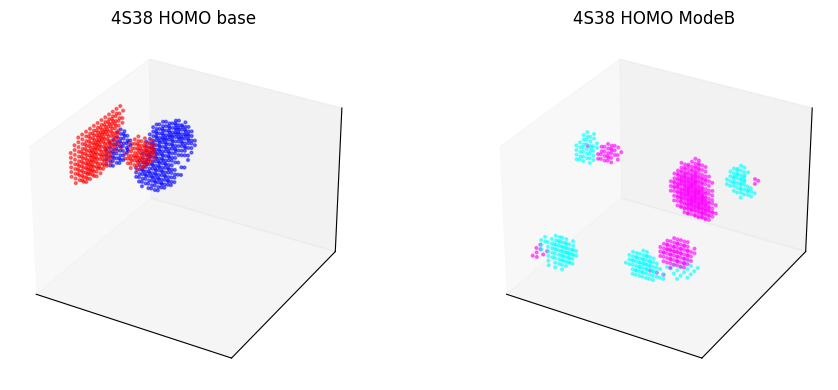

  Saved HOMO PNG: 4S38_HOMO_pair.png
  SHA512 PNG: 2e02dffa92e2c9d1937bd9826453c602ceb75b73b18a8d3618b650ed3fb7040f8efcc15e9442d19332619d569eee4fb7339836bec181ae1dd911228d8027a540

=== HOMO from 4S39_fe4s4_modeB.npz (tag=4S39) ===
SCF not converged.
SCF energy = -7704.11806918292
SCF not converged.
SCF energy = -7710.65019375568
  Saved HOMO NPZ: 4S39_HOMO.npz
  SHA512 NPZ: 335ee89e0b3651eddffc77725be8435434a680753b2977719c81ecfe3818482bae06ec50bdf10b83ed94d79120b7cc32f45dea6a59e1e16f71aeb11c42f8537f


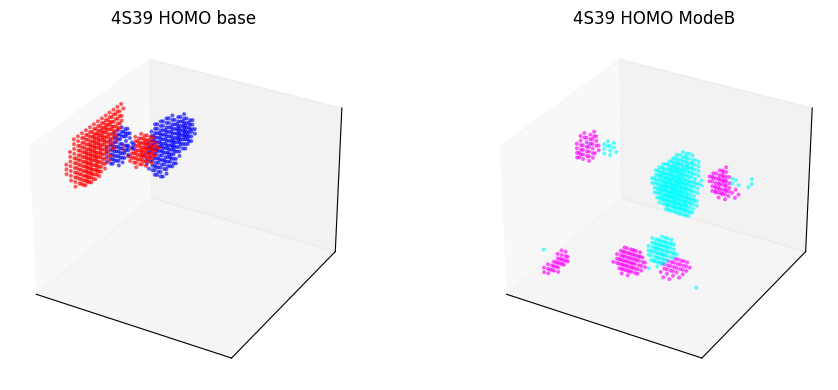

  Saved HOMO PNG: 4S39_HOMO_pair.png
  SHA512 PNG: 79cd9d36e3b91ab448bb0e30ab3dd5ef1f12a52e67ec5fad0b9db1301b5f5a1c475d75593287db908310d6e143906fecc66b8d90170b938c3514424cf57121a9

=== HOMO from 4S3A_fe4s4_modeB.npz (tag=4S3A) ===
SCF not converged.
SCF energy = -7706.85410514389
SCF not converged.
SCF energy = -7705.77840173982
  Saved HOMO NPZ: 4S3A_HOMO.npz
  SHA512 NPZ: 05036dbb1e1ea519ede835419b5361ecb5fc7ca32fcda78bcc8be6232535397a70f319884db455d665504680a672451984f5d2a3bf209e8439df485cd9a62e8a


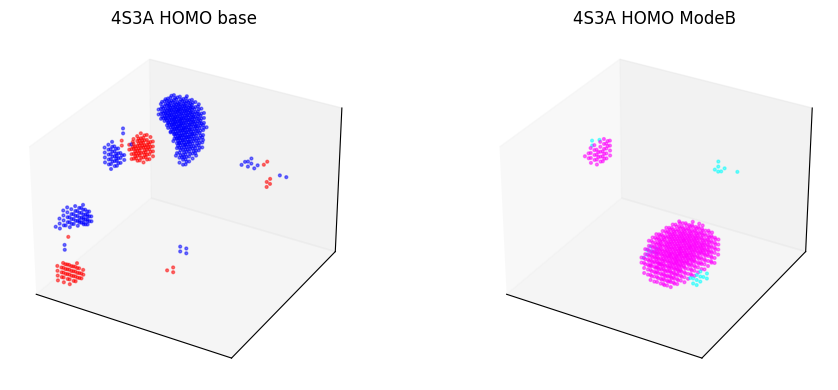

  Saved HOMO PNG: 4S3A_HOMO_pair.png
  SHA512 PNG: a5e7a6b5f7e752f7e2d0c7265ec49c1ff0781e73d9d942edf58a80d1e9e5c3f7bbf4e5c8890e123b8e3962f4bfb0016fa5d9106486fe2cc3b3425adf0ad003e0

=== HOMO from 4S3B_fe4s4_modeB.npz (tag=4S3B) ===
SCF not converged.
SCF energy = -7708.29174453731
SCF not converged.
SCF energy = -7706.76448352032
  Saved HOMO NPZ: 4S3B_HOMO.npz
  SHA512 NPZ: 1ab4ab04b304035914c8067ba6e3c0e46c6c4f9edd889e258c7c074c15001c706fc89971228206c90cf2b0cc6b089c332361c31b847096b4202b1fc5086f8700


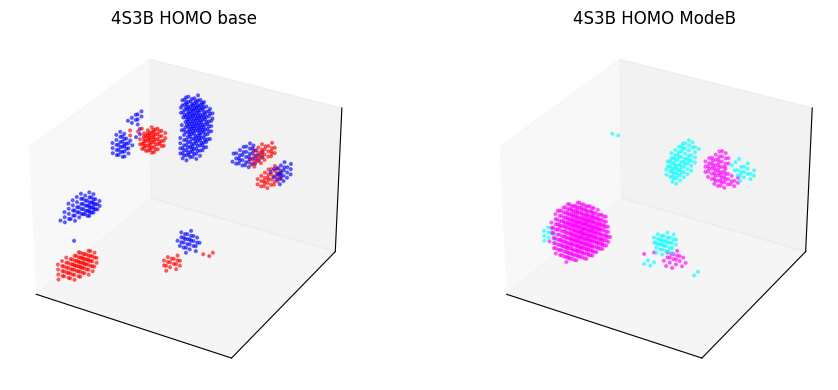

  Saved HOMO PNG: 4S3B_HOMO_pair.png
  SHA512 PNG: db5b16798fa432d03bf3787cdcae44b5631a2e2a19aef76f3862c62dd94552cb4b7e82ec295876b85f23e609cc0eee1e4e4c20978290c968e63119b745846395

=== HOMO from 4S3C_fe4s4_modeB.npz (tag=4S3C) ===
SCF not converged.
SCF energy = -7704.03748444882
SCF not converged.
SCF energy = -7706.41161631816
  Saved HOMO NPZ: 4S3C_HOMO.npz
  SHA512 NPZ: ab511d00b8c1a0afbf0fff7b3f89834218b33440d530968b1140e76e7b2384296b236e6f00d892875733e106e7621606b44560570bddebdc3997f0f25676c0c8


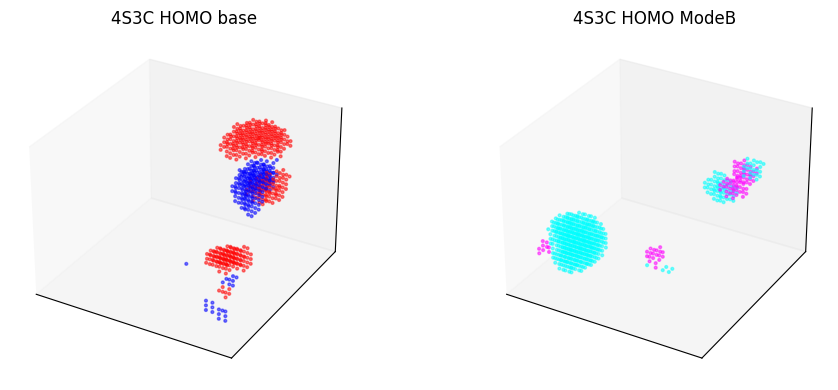

  Saved HOMO PNG: 4S3C_HOMO_pair.png
  SHA512 PNG: 9e2da635c03be16846a7359020b4c92ab5f137cc685acc4b68493c06ead11e91484245b62935c32553dab93fc6e368a4a0c6f0f0a1e85d75fe1a8766017ec320


In [ ]:
# ============================
# BLOCK H2 — RUN HOMO GENERATION
# ============================
os.chdir("/content/gqr_fe4s4_ispG")
modeb_npz = sorted(glob.glob("*_fe4s4_modeB.npz"))
print("ModeB NPZ files found:")
for f in modeb_npz:
    print("  ", f)

for f in modeb_npz:
    try:
        generate_homo_from_modeb_npz(f)
    except Exception as e:
        print("Error generating HOMO for", f, ":", e)